In [1]:
import warnings
warnings.filterwarnings('ignore')

warnings模块中定义的warn()函数来发出警告。我们可以通过警告过滤器进行控制是否发出警告消息[强迫症哈哈]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os

#  1. 数据探索

## 读取数据

In [3]:
#数据探索
#1 获取所有文件的名称和路径
data_path = './data/'  #数据存储路径
data_names = os.listdir(data_path)  #列举出data_path里面所有的文件名称
data = pd.DataFrame([])
for data_name in data_names:
    # 删除不是的文件
    if data_name.endswith('.csv'):
        print((data_name))
        #3 循环读取文件
        tmp =pd.read_csv(os.path.join(data_path,data_name),encoding='gbk')
        #4 文件存储
        data = pd.concat([data,tmp])
#data = pd.read_csv('./data/订单表2018-5.csv',encoding='gbk')  #读取
data.head()
data.info()  #数据总览
data.columns
![`在这里插入图片描述`](https://img-blog.csdnimg.cn/20200610154752146.png)
#查看缺失情况
data.isnull().sum()
ind = data['收款方'].isnull()
data.loc[ind,:]
ind = data['出货状态'].isnull()
data.loc[ind,:]

订单表2018-4.csv
订单表2018-5.csv
订单表2018-6.csv
订单表2018-7.csv
订单表2018-8.csv
订单表2018-9.csv
<class 'pandas.core.frame.DataFrame'>
Int64Index: 305300 entries, 0 to 65579
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   设备编号     305300 non-null  int64  
 1   下单时间     305300 non-null  object 
 2   订单编号     305300 non-null  object 
 3   购买数量(个)  305300 non-null  int64  
 4   手续费(元)   305300 non-null  float64
 5   总金额(元)   305300 non-null  float64
 6   支付状态     305300 non-null  object 
 7   出货状态     305297 non-null  object 
 8   收款方      305085 non-null  object 
 9   退款金额(元)  305300 non-null  float64
 10  购买用户     305300 non-null  object 
 11  商品详情     305300 non-null  object 
 12  省市区      305300 non-null  object 
 13  软件版本     305300 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 34.9+ MB


'[`在这里插入图片描述`]' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


,设备编号,下单时间,订单编号,购买数量(个),手续费(元),总金额(元),支付状态,出货状态,收款方,退款金额(元),购买用户,商品详情,省市区,软件版本
19011,113106,2018-09-21 16:12:59,113106hg153751757959133,1,0.01,1.0,微信,NaN,平台,0.0,ooCjVwNZSrIox7-lEOiCyxndohY0,可口可乐X1(嗨购中奖),广东省东莞市,V3.0.33;rk3288(Root);(900x1440)
19081,113106,2018-09-21 15:51:03,113106hg153751626318229,1,0.01,1.0,微信,NaN,平台,0.0,os-xL0j_JO2jpxdiMen817EW-LDY,康师傅冰红茶X1(嗨购中奖),广东省东莞市,V3.0.33;rk3288(Root);(900x1440)
22278,112908,2018-09-20 11:55:05,112908hg153741570583241,1,0.01,1.0,微信,NaN,平台,0.0,os-xL0pgLShChkcyV0XtT8Lpxr6E,孖髻山矿泉水X1(嗨购中奖),广东省东莞市,V3.0.37;rk3288(Root);(900x1440)


In [4]:
data.columns   #查找所有列名

Index(['设备编号', '下单时间', '订单编号', '购买数量(个)', '手续费(元)', '总金额(元)', '支付状态', '出货状态',
       '收款方', '退款金额(元)', '购买用户', '商品详情', '省市区', '软件版本'],
      dtype='object')

In [5]:
data.dtypes

设备编号         int64
下单时间        object
订单编号        object
购买数量(个)      int64
手续费(元)     float64
总金额(元)     float64
支付状态        object
出货状态        object
收款方         object
退款金额(元)    float64
购买用户        object
商品详情        object
省市区         object
软件版本        object
dtype: object

## 缺失值

In [6]:
data.isnull().sum()

设备编号         0
下单时间         0
订单编号         0
购买数量(个)      0
手续费(元)       0
总金额(元)       0
支付状态         0
出货状态         3
收款方        215
退款金额(元)      0
购买用户         0
商品详情         0
省市区          0
软件版本         0
dtype: int64

In [7]:
ind = data['收款方'].isnull()

In [8]:
data.loc[ind,:]

,设备编号,下单时间,订单编号,购买数量(个),手续费(元),总金额(元),支付状态,出货状态,收款方,退款金额(元),购买用户,商品详情,省市区,软件版本
1008,112657,2018-08-31 13:55:02,112657up153569490218001312,1,0.05,4.50,会员余额,出货成功,NaN,0.0,os-xL0j1ISDWxpSa-EAHjSVecsfw,维他柠檬茶（高罐X1,广东省广州市番禺区,V3.0.38;rk3288(Root);(900x1440)
1049,113106,2018-08-31 13:32:40,113106up153569356019401469,1,0.03,3.00,会员余额,出货成功,NaN,0.0,os-xL0uTt3yjT0EjFKkVWJhdwlp4,康师傅冰红茶X1,广东省东莞市,V3.0.33;rk3288(Root);(900x1440)
1051,113106,2018-08-31 13:32:13,113106up153569353314271469,1,0.02,1.50,会员余额,出货成功,NaN,0.0,os-xL0uh8zwJgn3-JcZjm1oUnFSw,肉松饼X1,广东省东莞市,V3.0.33;rk3288(Root);(900x1440)
1331,112657,2018-08-31 10:59:26,112657up153568436614981191,1,0.05,5.00,会员余额,出货成功,NaN,0.0,os-xL0qY5AfnNp5RRTWkRL_2vw94,雀巢咖啡X1,广东省广州市番禺区,V3.0.38;rk3288(Root);(900x1440)
1733,112792,2018-08-31 05:17:06,112792up153566382614381461,1,0.01,1.00,会员余额,出货成功,NaN,0.0,os-xL0kiHO1Rxf3aSI44llrGankA,深晖菊花茶X1,广东省广州市天河区,V3.0.35;rk3288(Root);(900x1440)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62187,112797,2018-09-02 23:52:18,112797up15359035381668833,3,0.12,12.00,会员余额,出货成功,NaN,0.0,os-xL0it7RmEyi0N9DIN7izpWehM,"脉动X1,脉动X1,脉动X1",广东省东莞市,V3.0.33;rk3288(Root);(900x1440)
63607,112792,2018-09-02 05:15:40,112792up153583654011091461,1,0.02,2.00,会员余额,出货成功,NaN,0.0,os-xL0hS4WiCq-mi1hUls-rf1yY8,花生牛奶纸盒装X1,广东省广州市天河区,V3.0.35;rk3288(Root);(900x1440)
63778,112792,2018-09-02 00:16:28,112792up153581858811781461,1,0.04,3.80,会员余额,出货成功,NaN,0.0,os-xL0sgqIyjn5F3IrUt5UfXMRko,银鹭八宝粥X1,广东省广州市天河区,V3.0.35;rk3288(Root);(900x1440)
64049,113069,2018-09-01 21:00:23,113069up153580682312341503,1,0.02,2.29,会员余额,出货成功,NaN,0.0,os-xL0mcEDJOP7ugGUsdraKrFtPA,雪碧330mlX1,广东省东莞市,V3.0.35;rk3288(Root);(900x1440)


In [9]:
ind = data['出货状态'].isnull()
data.loc[ind,:]

,设备编号,下单时间,订单编号,购买数量(个),手续费(元),总金额(元),支付状态,出货状态,收款方,退款金额(元),购买用户,商品详情,省市区,软件版本
19011,113106,2018-09-21 16:12:59,113106hg153751757959133,1,0.01,1.0,微信,NaN,平台,0.0,ooCjVwNZSrIox7-lEOiCyxndohY0,可口可乐X1(嗨购中奖),广东省东莞市,V3.0.33;rk3288(Root);(900x1440)
19081,113106,2018-09-21 15:51:03,113106hg153751626318229,1,0.01,1.0,微信,NaN,平台,0.0,os-xL0j_JO2jpxdiMen817EW-LDY,康师傅冰红茶X1(嗨购中奖),广东省东莞市,V3.0.33;rk3288(Root);(900x1440)
22278,112908,2018-09-20 11:55:05,112908hg153741570583241,1,0.01,1.0,微信,NaN,平台,0.0,os-xL0pgLShChkcyV0XtT8Lpxr6E,孖髻山矿泉水X1(嗨购中奖),广东省东莞市,V3.0.37;rk3288(Root);(900x1440)


In [10]:
ind = data['商品详情'].apply(lambda x: '嗨购中奖' in x)
data.loc[ind, :]

,设备编号,下单时间,订单编号,购买数量(个),手续费(元),总金额(元),支付状态,出货状态,收款方,退款金额(元),购买用户,商品详情,省市区,软件版本
16258,112707,2018-09-22 17:12:59,112707hg153760757920264,1,0.01,1.0,微信,取消出货,平台,0.0,os-xL0nhDnQ2vL1ySbXx3kTz9G-o,喜之郎芒果味X1(嗨购中奖),广东省佛山市顺德区,V3.0.37;rk3288(Root);(900x1440)
16260,112707,2018-09-22 17:12:16,112707hg153760753684541,1,0.01,1.0,微信,取消出货,平台,0.0,os-xL0vZC0H1ABAzPPiy7jMF2yHs,喜之郎芒果味X1(嗨购中奖),广东省佛山市顺德区,V3.0.37;rk3288(Root);(900x1440)
16264,112707,2018-09-22 17:11:35,112707hg153760749542358,1,0.01,1.0,微信,取消出货,平台,0.0,os-xL0qZh7lvdi8kWkaBrhZAjjlA,喜之郎芒果味X1(嗨购中奖),广东省佛山市顺德区,V3.0.37;rk3288(Root);(900x1440)
16271,112707,2018-09-22 17:07:21,112707hg153760724112767,1,0.01,1.0,微信,取消出货,平台,0.0,os-xL0t7ppnw2SRvp3MO65XZ_xt0,喜之郎芒果味X1(嗨购中奖),广东省佛山市顺德区,V3.0.37;rk3288(Root);(900x1440)
19011,113106,2018-09-21 16:12:59,113106hg153751757959133,1,0.01,1.0,微信,NaN,平台,0.0,ooCjVwNZSrIox7-lEOiCyxndohY0,可口可乐X1(嗨购中奖),广东省东莞市,V3.0.33;rk3288(Root);(900x1440)
19081,113106,2018-09-21 15:51:03,113106hg153751626318229,1,0.01,1.0,微信,NaN,平台,0.0,os-xL0j_JO2jpxdiMen817EW-LDY,康师傅冰红茶X1(嗨购中奖),广东省东莞市,V3.0.33;rk3288(Root);(900x1440)
22278,112908,2018-09-20 11:55:05,112908hg153741570583241,1,0.01,1.0,微信,NaN,平台,0.0,os-xL0pgLShChkcyV0XtT8Lpxr6E,孖髻山矿泉水X1(嗨购中奖),广东省东莞市,V3.0.37;rk3288(Root);(900x1440)
24258,112657,2018-09-19 14:28:48,112657hg153733852863870,1,0.02,2.0,微信,出货成功,平台,0.0,ooCjVwJKF-J8D5GQBY-dgBiIE1-k,天地一号X1(嗨购中奖),广东省广州市番禺区,V3.0.38;rk3288(Root);(900x1440)
24301,112657,2018-09-19 14:14:47,112657hg153733768785143,1,0.01,1.0,微信,出货成功,平台,0.0,os-xL0tNSoouswuQUgwGkBRtS5jM,康师傅冰红茶X1(嗨购中奖),广东省广州市番禺区,V3.0.38;rk3288(Root);(900x1440)
24305,112657,2018-09-19 14:12:25,112657hg153733754521951,1,0.03,3.0,微信,出货成功,平台,0.0,os-xL0l3ryOa3f6AX1czUavQr7f4,红牛X1(嗨购中奖),广东省广州市番禺区,V3.0.38;rk3288(Root);(900x1440)


## 设备编号

## 订单编号

In [14]:
data['订单编号'].value_counts()   # 正确

112801qr15345709171264    1
112657qr15264648658730    1
112675qr15382919113723    1
112810qr15323342031020    1
112891qr15376928491574    1
                         ..
112667qr15350993149362    1
113117qr15357014267617    1
112725qr15316279313277    1
113109qr15367615807367    1
114221qr15375080899291    1
Name: 订单编号, Length: 305300, dtype: int64

## 支付状态

In [15]:
num = data['支付状态'].value_counts()

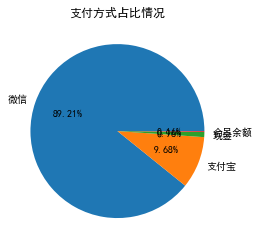

In [16]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.pie(num, autopct='%.2f%%', labels=num.index)
plt.title('支付方式占比情况')
plt.show()

## 出货状态

In [17]:
num = data['出货状态'].value_counts()

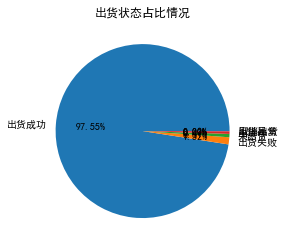

In [18]:
plt.pie(num,autopct='%.2f%%',labels=num.index)
plt.title('出货状态占比情况')
plt.show()

In [19]:
ind = data['出货状态'] != '出货成功'
data.loc[ind, :]

,设备编号,下单时间,订单编号,购买数量(个),手续费(元),总金额(元),支付状态,出货状态,收款方,退款金额(元),购买用户,商品详情,省市区,软件版本
55,112538,2018-04-30 17:16:24,112538qr15250797837585,1,0.04,4.0,微信,出货中,鑫零售结算,0.0,os-xL0njetHFwhYx7UIafQ9boMtg,营养快线X1;,广东省广州市番禺区,V3.0.37.2;rk3288(Root);(900x1440)
70,112538,2018-04-30 16:17:27,112538qr15250762465270,1,0.05,5.0,微信,出货中,鑫零售结算,0.0,os-xL0oM4zQIWbtB_BqHYJAkYjls,雀巢咖啡X1;,广东省广州市番禺区,V3.0.37.2;rk3288(Root);(900x1440)
94,112538,2018-04-30 15:00:24,112538qr15250716613388,1,0.02,2.0,微信,出货中,鑫零售结算,0.0,os-xL0idPQxTG2Nf0Xl6-5ETtBiE,孖髻山矿泉水X1;,广东省广州市番禺区,V3.0.37.2;rk3288(Root);(900x1440)
96,112538,2018-04-30 14:49:24,112538qr15250710012060,1,0.02,2.0,微信,出货中,鑫零售结算,0.0,os-xL0tQtrvrqtQkZU0kWlBdjTpk,孖髻山矿泉水X1;,广东省广州市番禺区,V3.0.37.2;rk3288(Root);(900x1440)
127,112538,2018-04-30 13:16:12,112538qr15250654108298,1,0.04,4.0,微信,出货中,鑫零售结算,0.0,os-xL0n6VZp2xjvtWOqwMytAxX-k,东鹏特饮X1;,广东省广州市番禺区,V3.0.37.2;rk3288(Root);(900x1440)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304850,112541,2018-09-01 10:20:14,112541qr15357685424806,1,0.03,3.0,支付宝,出货失败,平台,0.0,os-xL0tkm-RRQOwh_508o8ynR-xo,孖髻山矿泉水X1,广东省珠海市香洲区,V3.0.33;rk3288(Root);(900x1440)
304994,112541,2018-09-01 08:37:02,112541qr15357623067252,1,0.05,5.0,微信,出货失败,平台,0.0,os-xL0g3BcAnm90DXWF8LkpTShoo,黄油蛋糕X1,广东省珠海市香洲区,V3.0.33;rk3288(Root);(900x1440)
304998,112797,2018-09-01 08:34:50,112797qr15357621516164,1,0.04,3.8,微信,出货失败,平台,0.0,os-xL0n1kcOHOuurpVdZHyKQewUE,银鹭花生牛奶X1,广东省东莞市,V3.0.33;rk3288(Root);(900x1440)
305095,112541,2018-09-01 07:10:45,112541qr15357571791943,2,0.06,6.0,微信,出货失败,平台,0.0,os-xL0qxa0Vc7YkTN45I5pA4Zgbg,"孖髻山矿泉水X1,孖髻山矿泉水X1",广东省珠海市香洲区,V3.0.33;rk3288(Root);(900x1440)


## 收款方

In [20]:
data['收款方'].value_counts()

平台            236562
鑫零售结算          59822
售货机自收           5128
售货机自收(鑫零售)      3573
Name: 收款方, dtype: int64

In [21]:
ind = data['收款方'] == '售货机自收'
data.loc[ind, :]

,设备编号,下单时间,订单编号,购买数量(个),手续费(元),总金额(元),支付状态,出货状态,收款方,退款金额(元),购买用户,商品详情,省市区,软件版本
691,112688,2018-04-27 21:01:17,112688dc15248340775681sd,1,0.0,1.0,现金,出货成功,售货机自收,0.0,os-xL0r0norIHZIXR-b3IIsTlUeo,三利和 酱香鱼X1;,广东省广州市番禺区,V3.0.37;rk3288(Root);(900x1440)
692,112688,2018-04-27 21:01:12,112688dc15248340725476sd,1,0.0,1.0,现金,出货成功,售货机自收,0.0,os-xL0jUgsEyh2--jclioyLDLyAw,三利和 酱香鱼X1;,广东省广州市番禺区,V3.0.37;rk3288(Root);(900x1440)
715,112688,2018-04-27 19:33:45,112688dc15248288255496sd,1,0.0,1.0,现金,出货失败,售货机自收,0.0,os-xL0i7ZfI356CEDjBBeanyqKwU,三利和 酱香鱼X1;,广东省广州市番禺区,V3.0.37.2;rk3288(Root);(900x1440)
2076,112077,2018-04-03 16:59:20,112077dc15227459603052,1,0.0,50.5,现金,出货成功,售货机自收,0.0,os-xL0uXe442H3oJrMw6ciY78BGM,15X1;,广东省广州市天河区,V3.0.37;rk3288(Root);(900x1440)
2077,112077,2018-04-03 16:55:35,112077dc15227457353503,1,0.0,50.5,现金,出货成功,售货机自收,0.0,os-xL0kg7opE8zl7xVTOVbbpbXFo,15X1;,广东省广州市天河区,V3.0.37;rk3288(Root);(900x1440)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305291,113595,2018-09-01 00:06:32,113595qr15357315927198,1,0.0,3.0,微信,出货成功,售货机自收,0.0,os-xL0vZR50zo54Ra4vflWZnakNE,维他奶X1,广东省广州市黄埔区,V3.0.33;rk3288(Root);(900x1440)
305292,113612,2018-09-01 00:05:07,113612dc15357315071312,2,0.0,7.0,现金,出货成功,售货机自收,0.0,os-xL0ruwb3He3YesRdWgKSYAY_U,"伊利麦香味早餐奶X1,伊利麦香味早餐奶X1",广东省东莞市,V3.0.37.2;rk3288(Root);(900x1440)
305294,113595,2018-09-01 00:03:23,113595qr15357314037541,1,0.0,3.0,支付宝,出货成功,售货机自收,0.0,os-xL0k6uvMPCIFL8n9-bATPop2o,瓶装可口可乐X1,广东省广州市黄埔区,V3.0.33;rk3288(Root);(900x1440)
305298,113595,2018-09-01 00:01:56,113595qr15357313164791,1,0.0,2.5,微信,出货成功,售货机自收,0.0,os-xL0lmdMczOP1MGhwOXJJrPMgM,罐装康师傅冰红茶X1,广东省广州市黄埔区,V3.0.33;rk3288(Root);(900x1440)


## 省市区

In [22]:
data['省市区'].value_counts()

广东省中山市       73143
广东省东莞市       69120
广东省广州市番禺区    39630
广东省广州市白云区    22704
广东省广州市天河区    20499
广东省广州市越秀区    18540
广东省珠海市香洲区    11725
广东省佛山市南海区     8915
广东省深圳市龙岗区     8521
广东省广州市海珠区     5110
广东省韶关市武江区     4187
广东省广州市从化区     3677
广东省深圳市        3507
广东省广州市花都区     3470
广东省佛山市顺德区     2843
广东省广州市荔湾区     2458
广东省广州市黄埔区     1966
广东省佛山市禅城区     1565
广东省广州市增城区     1397
广东省广州市         971
广东省佛山市         711
广东省广州市南沙区      505
广东省清远市清城区      136
Name: 省市区, dtype: int64

# 数据预处理

## 下单时间修改为时间格式的数据

In [23]:
data['下单时间'] = pd.to_datetime(data['下单时间'])
data['下单时间'].dt.weekday

0         0
1         0
2         0
3         0
4         0
         ..
305295    5
305296    5
305297    5
305298    5
305299    5
Name: 下单时间, Length: 305300, dtype: int64

## 出货状态只保留"出货成功"的数据

In [24]:
ind = data['出货状态'] == '出货成功'
data2 = data.loc[ind, :]
data2.shape

(297805, 14)

## 提取城市信息

In [25]:
data2['city'] = data2['省市区'].apply(lambda x: re.findall('.{2}市', x)[0])
# data2['省市区'].apply(lambda x: re.findall('省(.+市)', x)[0])

In [26]:
data2['city'].value_counts()

广州市    118720
中山市     69621
东莞市     68124
佛山市     13845
深圳市     11937
珠海市     11309
韶关市      4122
清远市       127
Name: city, dtype: int64

## 商品名称更新

In [27]:
data2['商品详情'] = data2['商品详情'].str.replace('百事可以', '百事可乐')
data2['商品详情'] = data2['商品详情'].str.replace('苿莉花茶', '茉莉花茶')
data2['商品详情'] = data2['商品详情'].str.replace('茶TT', '茶π')
data2['商品详情'] = data2['商品详情'].str.replace('nl', '')
data2['商品详情'] = data2['商品详情'].str.replace('毫升', '')
data2['商品详情'] = data2['商品详情'].str.replace('乐事薯片', '乐事')
data2['商品详情'] = data2['商品详情'].apply(lambda x: re.sub('（[^;,xX]+）?|[罐瓶盒]装?|', '', x))
data2['商品详情'] = data2['商品详情'].str.replace('马蒂爽', '马蹄爽')
data2['商品详情'] = data2['商品详情'].str.replace('鲜蘑豆奶', '鲜磨豆奶')
data2['商品详情'] = data2['商品详情'].apply(lambda x: re.sub('广氏菠萝啤|廣式菠萝啤|菠萝啤酒', '菠萝啤', x))
data2['商品详情'] = data2['商品详情'].str.replace('威化瓶干', '威化饼干')
data2['商品详情'] = data2['商品详情'].str.replace('康师父', '康师傅')
data2['商品详情'] = data2['商品详情'].str.replace('张三疯', '张三丰')
data2['商品详情'] = data2['商品详情'].str.replace('蓝莓味', '蓝莓')
data2['商品详情'] = data2['商品详情'].str.replace('西柚味', '西柚')
data2['商品详情'] = data2['商品详情'].str.replace('柠檬味', '柠檬')
data2['商品详情'] = data2['商品详情'].apply(lambda x: re.sub('水蜜桃[^;,xX]+', '蜜桃', x))
data2['商品详情'] = data2['商品详情'].apply(lambda x: re.sub('青柠[^;,xX]+', '青柠', x))
data2['商品详情'] = data2['商品详情'].str.upper()
data2['商品详情'] = data2['商品详情'].str.replace('ML', '')

## 提取商品名称及数量

In [28]:
t = data2['商品详情'].apply(lambda x: re.findall('([^,;xX]+) ?[Xx]([0-9]{1,2})', x))
from tkinter import _flatten
goods = t.apply(lambda x: list(_flatten(x))[::2])
numbers = t.apply(lambda x: list(_flatten(x))[1::2])
goods_data = pd.DataFrame({'goods': goods, 'numbers': numbers})
goods_data.head()

,goods,numbers
0,[可口可乐],[1]
1,[旺仔牛奶],[1]
2,[雪碧330],[1]
3,[阿萨姆奶茶],[1]
4,[王老吉],[1]


In [29]:
 #goods_data.to_csv('./goods_data.csv')

In [30]:
names = _flatten(list(goods_data['goods']))
num = _flatten(list(goods_data['numbers']))
new_goods_data = pd.DataFrame({'产品名称': names, '购买数量': num})
new_goods_data.head()

,产品名称,购买数量
0,可口可乐,1
1,旺仔牛奶,1
2,雪碧330,1
3,阿萨姆奶茶,1
4,王老吉,1


In [31]:
new_goods_data['产品名称'].sort_values().drop_duplicates().to_csv('./goods.csv')

# 数据分析

## 分析商品销售排行榜：用户喜欢的商品有哪些？

### 畅销品

目的：为运营服务（方便推荐（二八法则）；商场摆设、采购、培训使得销售利润最大化）
确认畅销品的方法：销售量排名、二八法则、ABC法则
什么样的商品是畅销品？

只看销售量、销售额（销售量、销售额等）
销售不错且能持续提供库存支持的商品（销售量、销售额、库存量、库存天数、库存周数等）
只有能够持续给公司创造销售和利润，且占用最优资金量的商品（销售量、销售额、库存量、库存天数、库存周数、毛利率等特征）

In [32]:
new_goods_data.dtypes

产品名称    object
购买数量    object
dtype: object

In [33]:
new_goods_data['购买数量'] = new_goods_data['购买数量'].astype(int)
num = new_goods_data.groupby('产品名称').agg(sum).sort_values('购买数量', ascending=False)

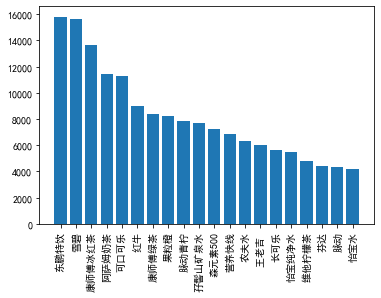

In [34]:
plt.bar(range(20), num['购买数量'][:20])
plt.xticks(range(20), num.index[:20], rotation=90)
plt.show()

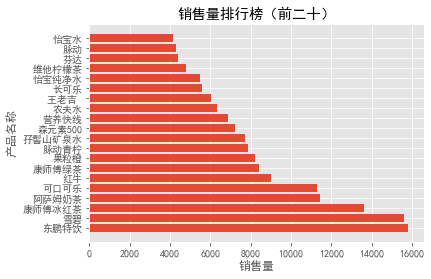

In [35]:
plt.style.use('ggplot')
plt.barh(range(20), num['购买数量'][:20])
plt.yticks(range(20), num.index[:20])
plt.ylabel('产品名称')
plt.xlabel('销售量')
plt.title('销售量排行榜（前二十）')
plt.show()

# 分析某一台设备不同时间的销售情况

In [36]:
ind = data2['设备编号'] == 112866
data_112 = data2.loc[ind, :]

In [37]:
data_112.shape
data_112.columns

Index(['设备编号', '下单时间', '订单编号', '购买数量(个)', '手续费(元)', '总金额(元)', '支付状态', '出货状态',
       '收款方', '退款金额(元)', '购买用户', '商品详情', '省市区', '软件版本', 'city'],
      dtype='object')

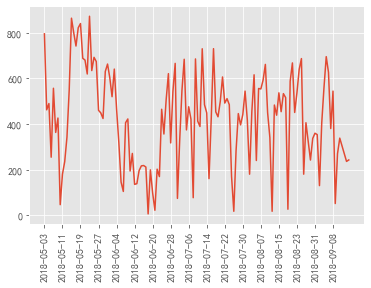

In [38]:
# 某一台设备不同日期的销售情况
data_112['date'] = data_112['下单时间'].dt.date
data_112['income'] = data_112['总金额(元)'] - data_112['退款金额(元)']
num = data_112[['date', 'income']].groupby('date').sum().sort_index()

plt.plot(num.index, num)
plt.xticks(num.index[::8], num.index[::8], rotation=90)
plt.show()

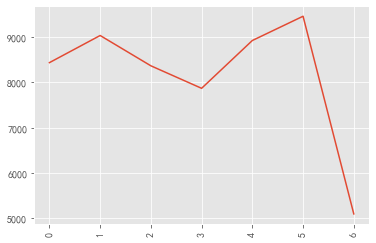

In [39]:
# 某一台设备不同星期的销售情况
data_112['weekday'] = data_112['下单时间'].dt.weekday
num = data_112[['weekday', 'income']].groupby('weekday').sum().sort_index()
plt.plot(num.index, num)
plt.xticks(num.index, num.index, rotation=90)
plt.show()


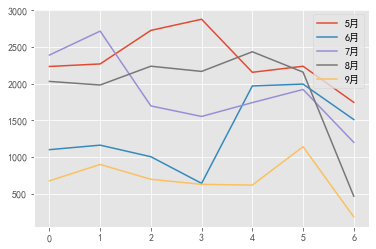

In [40]:
data_112['month'] = data_112['下单时间'].dt.month
num = data_112[['weekday', 'income', 'month']].groupby(['month', 'weekday']).sum()
num = num.unstack()  #最内层的行索引还原成了列索引
week = [0, 1, 2, 3, 4, 5, 6]
num2 = num.loc[:, [('income', i) for i in week]]
for i in range(5, 10):
    plt.plot(week, num2.loc[i, :])
plt.legend([f'{i}月' for i in range(5, 10)])
plt.show()


## 某一台设备不同时间的销售情况

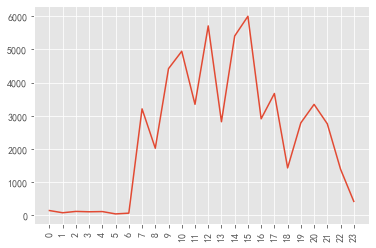

In [41]:
data_112['hour'] = data_112['下单时间'].dt.hour
num = data_112[['hour','income']].groupby('hour').sum().sort_index()
plt.plot(num.index,num)
plt.xticks(num.index,num.index,rotation=90)  #rotation旋转角度下标
plt.show()


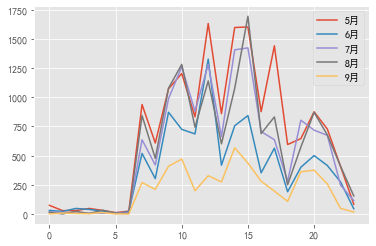

In [42]:
data_112['hour'] = data_112['下单时间'].dt.hour
num = data_112[['hour','income','month']].groupby(['month','hour']).sum()
num = num.unstack().fillna(0)  #fillna 缺失值填为0

for i in range(5, 10):
    plt.plot(range(24), num.loc[i, :])
plt.legend([f'{i}月' for i in range(5, 10)])
plt.show()


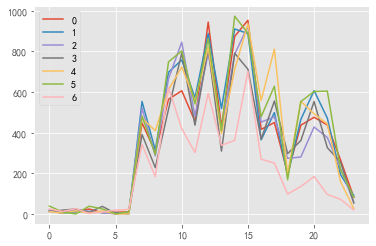

In [43]:
data_112['hour'] = data_112['下单时间'].dt.hour
num = data_112[['hour', 'income', 'weekday']].groupby(['weekday', 'hour', ]).sum()
num = num.unstack().fillna(0)

for i in num.index:
    plt.plot(range(24), num.loc[i, :])
plt.legend(num.index)
plt.show()

## 不同时间的销售情况

In [44]:
data2.columns

Index(['设备编号', '下单时间', '订单编号', '购买数量(个)', '手续费(元)', '总金额(元)', '支付状态', '出货状态',
       '收款方', '退款金额(元)', '购买用户', '商品详情', '省市区', '软件版本', 'city'],
      dtype='object')

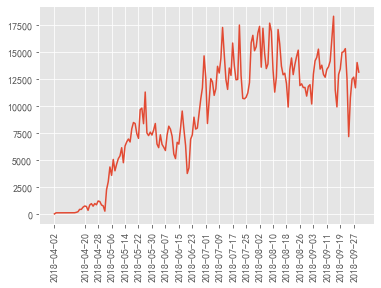

In [45]:
# 不同日期的销售情况
data2['date'] = data2['下单时间'].dt.date
data2['income'] = data2['总金额(元)'] - data2['退款金额(元)']
num = data2[['date', 'income']].groupby('date').sum().sort_index()

plt.plot(num.index, num)
plt.xticks(num.index[::8], num.index[::8], rotation=90)
plt.show()

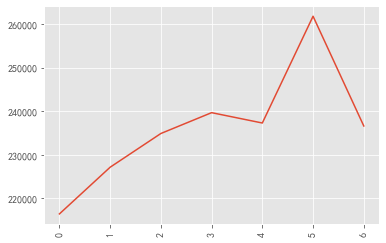

In [46]:
# 不同星期的销售情况
data2['weekday'] = data2['下单时间'].dt.weekday
num = data2[['weekday', 'income']].groupby('weekday').sum().sort_index()
plt.plot(num.index, num)
plt.xticks(num.index, num.index, rotation=90)
plt.show()

## 分析城市销售情况

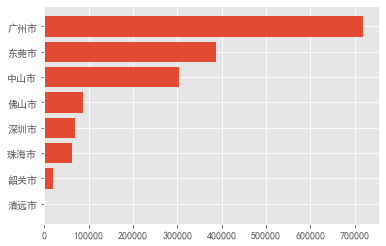

In [47]:
num = data2[['city', 'income']].groupby('city').sum().sort_values('income')
plt.barh(num.index, num['income'])
plt.show()

In [48]:
# 绘制地理图表展示城市之间的空间关系
from pyecharts.charts import Geo, Map
import pyecharts.options as opts
from pyecharts.globals import ChartType

(
    Geo()
    .add_schema(maptype='广东')
    .add('', [(i, int(j)) for i,j in zip(num.index, num['income'])],
         type_=ChartType.EFFECT_SCATTER)
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title='各个城市销售量情况', subtitle='2018/4-2018/9'),
        visualmap_opts=opts.VisualMapOpts(max_=max(num.max()), is_piecewise=True)
    )
).render('./各个城市销售量情况.html')

'D:\\jupyter_file\\all\\新零售销售\\各个城市销售量情况.html'

In [49]:
num2

income                                                
weekday       0       1       2       3       4       5       6
month                                                          
5        2235.0  2269.5  2727.5  2879.5  2155.5  2238.0  1745.0
6        1099.5  1161.0  1003.0   639.5  1969.0  1994.5  1510.5
7        2390.5  2717.5  1696.5  1552.5  1741.5  1921.0  1199.0
8        2031.0  1982.0  2238.5  2167.5  2435.5  2158.0   464.0
9         674.0   897.5   695.0   626.0   616.0  1140.0   181.5

In [50]:
# 绘制地理图表展示不同月份不同城市之间的空间关系
from pyecharts.charts import Geo, Timeline
import pyecharts.options as opts
from pyecharts.globals import ChartType

data2['month'] = data2['下单时间'].dt.month
num = data2[['month', 'income', 'city']].groupby(['month', 'city']).sum()
num2 = num.unstack()
num2 = num2.fillna(0)

tmp = {}
for i in range(4, 10):
    num = num2.loc[i, :]
    tmp[i] = (
        Geo()
        .add_schema(maptype='广东')
        .add('', [(i[1], int(j)) for i,j in zip(num.index, list(num.values))],
             type_=ChartType.EFFECT_SCATTER)
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            title_opts=opts.TitleOpts(title='各个城市销售量情况', subtitle='2018/4-2018/9'),
            visualmap_opts=opts.VisualMapOpts(max_=max(num2.max()), is_piecewise=True)
        )
    )
    
tl = Timeline()
for i in range(4, 10):
    tl.add(tmp[i], str(i)+'月')
    
tl.render('./各个城市销售量情况(含时间轴).html')

'D:\\jupyter_file\\all\\新零售销售\\各个城市销售量情况(含时间轴).html'

# 销售环比

In [51]:
# 计算周的销售额环比
data2['week'] = data2['下单时间'].dt.week
# 1、计算每一周的销售额
tmp = data2[['week', 'income']].groupby('week').sum()
# 2、计算销售额环比：（本期销售额-上期销售额）/上期销售额
t2 = tmp.diff().iloc[1:, :]
t2.index = tmp.index[:-1]
num = t2/tmp  # 销售额的周环比

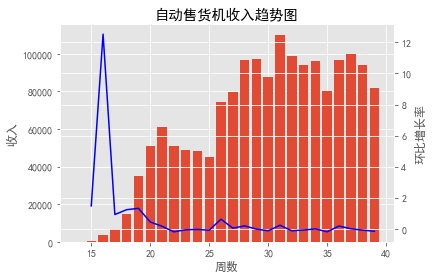

In [52]:
# 可视化:双Y轴图像
fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)  # 添加子图
ax1.bar(tmp.index, tmp['income'])
ax1.set_ylabel('收入')
ax1.set_xlabel('周数')
ax1.set_title('自动售货机收入趋势图')

ax2 = ax1.twinx()
ax2.plot(tmp.index[1:], num.iloc[:-1, 0], 'b')
ax2.set_ylabel('环比增长率')
plt.show()

## 月环比

In [53]:
# 计算月的销售额环比
# 1、计算每月的销售额
tmp = data2[['month', 'income']].groupby('month').sum()
# 2、计算销售额环比：（本期销售额-上期销售额）/上期销售额
t2 = tmp.diff().iloc[1:, :]
t2.index = tmp.index[:-1]
num = t2/tmp  # 销售额的月环比

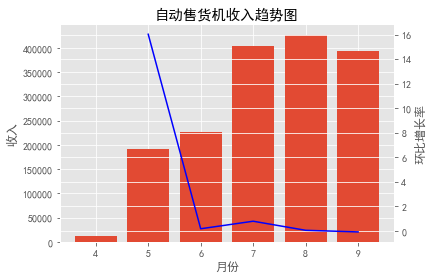

In [54]:
# 可视化:双Y轴图像
fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)  # 添加子图
ax1.bar(tmp.index, tmp['income'])
ax1.set_ylabel('收入')
ax1.set_xlabel('月份')
ax1.set_title('自动售货机收入趋势图')

ax2 = ax1.twinx()
ax2.plot(tmp.index[1:], num.iloc[:-1, 0], 'b')
ax2.set_ylabel('环比增长率')
plt.show()

## 广州地区的周环比

In [55]:
# 计算周的销售额环比
data_gz = data2.loc[data2['city'] == '广州市', :]
data_gz['week'] = data_gz['下单时间'].dt.week
# 1、计算每一周的销售额
tmp = data_gz[['week', 'income']].groupby('week').sum()
# 2、计算销售额环比：（本期销售额-上期销售额）/上期销售额
t2 = tmp.diff().iloc[1:, :]
t2.index = tmp.index[:-1]
num = t2/tmp  # 销售额的周环比
num

,income
week,
14,1.498269
15,12.324911
16,0.627117
17,0.491588
18,1.290459
19,0.202853
20,0.275102
21,-0.155177
22,-0.079144


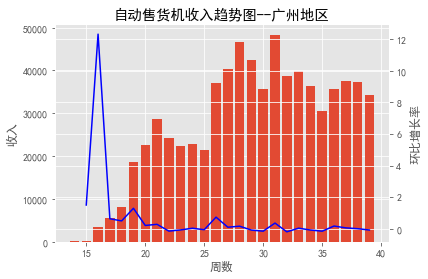

In [56]:
# 可视化:双Y轴图像
fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)  # 添加子图
ax1.bar(tmp.index, tmp['income'])
ax1.set_ylabel('收入')
ax1.set_xlabel('周数')
ax1.set_title('自动售货机收入趋势图--广州地区')

ax2 = ax1.twinx()
ax2.plot(tmp.index[1:], num.iloc[:-1, 0], 'b')
ax2.set_ylabel('环比增长率')
plt.show()

# 不同商品单价的销售情况

In [57]:
# 1、获取商品单价
# 2、获取商品购买数量
# 3、划分单价区间
# 4、不同单价区间的销售情况

In [58]:
ind = data2['购买数量(个)'] == 1
data2['goods'] = data2['商品详情'].apply(lambda x: re.sub('[Xx]1[;,]?', '', x))
price_data = data2.loc[ind, ['goods', '总金额(元)']].drop_duplicates('goods')

In [59]:
new_data = pd.merge(new_goods_data, price_data, how='left', left_on='产品名称', right_on='goods')

In [60]:
ind = new_data['goods'].isnull()
tmp_sets = new_data.loc[ind, '产品名称'].unique()
ind = data2['商品详情'].apply(lambda x: sum([i in x for i in tmp_sets])!=0)
tmp = data2.loc[ind, :].apply(lambda x: ([i for i in tmp_sets if i in x['商品详情']], x['购买数量(个)'], x['总金额(元)']), axis=1)
tmp = pd.DataFrame({'name':[i[0][0] for i in tmp], 'num':[i[1] for i in tmp], 'total_price': [i[2] for i in tmp]})

In [61]:
tmp['price'] = tmp['total_price']/tmp['num']
tmp2 = tmp.drop_duplicates('name')[['name', 'price']]

In [62]:
new_data = pd.merge(new_data, tmp2, how='left', left_on='产品名称', right_on='name')

In [63]:
ind = new_data['总金额(元)'].isnull()
new_data['单价'] = 0
new_data.loc[ind, '单价'] = new_data.loc[ind, 'price'].copy()
new_data.loc[~ind, '单价'] = new_data.loc[~ind, '总金额(元)'].copy()

In [64]:
ind = new_data['单价'].notnull()
new_data = new_data.loc[ind, ['产品名称', '购买数量', '单价']]

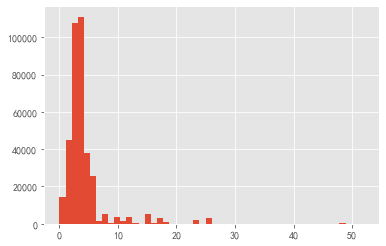

In [65]:
plt.hist(np.repeat(new_data['单价'], new_data['购买数量']), bins=50)
plt.show()

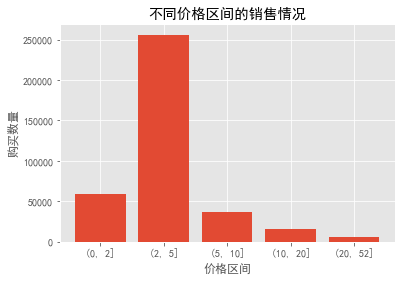

In [66]:
# 指定单价区间
bins = pd.IntervalIndex.from_tuples([(0, 2), (2, 5), (5, 10), (10, 20), (20, 52)])
new_data['bins'] = pd.cut(new_data['单价'], bins)
num = new_data[['bins', '购买数量']].groupby('bins').sum()

plt.bar(range(5), num['购买数量'])
plt.title('不同价格区间的销售情况')
plt.xlabel('价格区间')
plt.ylabel('购买数量')
plt.xticks(range(5), num.index)
plt.show()

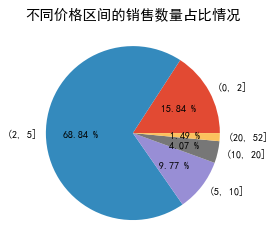

In [67]:
plt.pie(num['购买数量'], labels=num.index, autopct='%.2f %%')
plt.title('不同价格区间的销售数量占比情况')
plt.show()